# Project Three - Frisbee Flight
Adi Sudhakar and George Tighe

Abstract: We are modeling the two-dimensional flight of a frisbee, sweeping through different angles of attack and launch angles to find the optimal charactersics for a maximum horizontal distance. We found that the optimal throw had an angle of attack of 14 degrees and a launch angle of 10 degrees, producing a horizontal distance of about 81 meters. A scatter plot of launch angle and angle of attack versus maximum horizontal distance is shown below.

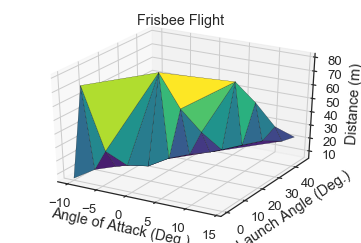

In [0]:
#Scatter Plot

Question: Olin is known world-wide for the quality of its athletes. Ultimate frisbee, one of two sports at Olin, is one of Olin's best sports teams (usually ranked in the top two at Olin each year). As true student-atheletes, it is our goal to optimize our understanding and application of long frisbee throws. And so we ask the question: What is the optimal angle of attack and launch angle to throw a frisbee at a fixed translational velocity to get the furthest horizontal distance?

Methodology: We will be limiting our model of a frisbee's flight to only two dimensions (which we are taking to be x and z). Thus the spin of the frisbee causing sideways motion is not considered. Our frisbee then becomes a projectile, with the following characteristics:


*   Angle of attack (angle between the plane of the frisbee and its velocity vector)
*   Launch angle (angle between initial velocity vector and the horizontal)
*   Aerodynamic lift force 
*   Aerodynamic drag force

Frisbee flight depends on the gyroscopic stabilization of its spin, but we chose to assume the spin was enough to allow projectile motion but not impact trajectory. The vertical lift force of the frisbee comes from its airfoil shape, where airflow on top of the disc moves faster than that below, producing a pressure gradient due to Bernoulli's Principle, lifting the frisbee to the lower pressure air above it. The aerodynamic drag force is caused by air resistance due to the frisbee's profile, skin-drag, and lift-induced drag. These two forces are computed as L = (1/2)pACₗv² and D = (1/2)pAC<sub>d</sub>v², where Cₗ and C<sub>d</sub> are the unitless coefficients of lift and drag, respectively, which are determined experimentally and change with variable angle of attack.

Our physical model calculates the overall vertical force on the frisbee (lift and gravity) and the overall drag force and updates the velocity and position of the disc in each time step.

We are making a few assumptions in our model of flight.



*   The frisbee is a Discraft Ultrastar 175g
*   Changing angle of attack during flight is not considered
*   Our model only works for angles of attack below ~15 degrees




We are sweeping angle of attack and launch angle to find the maximum horizontal distance possible.
  





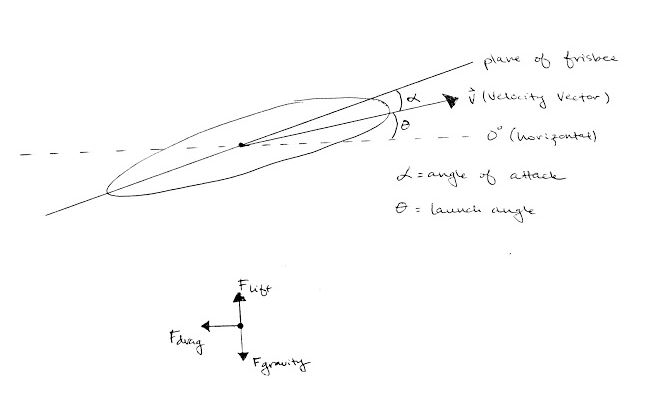

In [0]:
#Importing necessary libraries
from modsim import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [0]:
#Creating our Launch Angle Series to sweep through
launch = SweepSeries()
launch = linrange(0, 50, 5)
launch = launch * pi / 180

#Creating our Angle of Attack Series to sweep through
aattack = SweepSeries()
aattack = linrange(-10, 16, 2)

In [0]:
#Creating System object with constants, angles, initial velocity, and timestep
#m = mass of disc, d = diameter of disc, v0 = initial translational velocity, 
#g = acceleration due to gravity, p_air = density of air, dt = time step

system = System(m = 0.175, d = 0.27, v0 = 15, launch = launch, aattack = aattack, g = -9.8,  
                p_air = 1.23, dt = 0.1)

state = State(xpos = 0, zpos = 1, vx = 14, vz = 0)

In [0]:
#Function that outputs the drag force for a given angle of attack.
def drag(system, state, alpha):
    
    unpack(system)
    
    A = 0.057 #m^2. Planform area of the frisbee
    
    cd = 0.08 + ((alpha+4)*pi/180)**2 #Calculation of coefficient of drag
    
    fdrag = p_air*A*cd*(state.vx**2) #Calculation of drag force
        
    return fdrag

In [0]:
#Function that outputs the lift force for a given angle of attack
def lift(system, state, alpha):
  
    unpack(system)
    
    A = 0.057 #m^2. Planform area of the frisbee

    cl = 0.1 + (1.4*alpha*pi/180)
    clift = clf(aattack)
    v = ((state.vx**2)+(state.vz**2))**(1/2)
    flift = (1/2)*p_air*A*cl*(state.vx**2) #Lift force.
    return flift

In [0]:
#Function that outputs the state of the model in the next time step
def updatefunction(system, state, t, alpha):
    
    unpack(system)
    
    fvert = lift(system, state, alpha) + (m*g) #Calculating total vertical force
    
    dvz = fvert*dt / m #Calculating change in vertical velocity
    dvx = -drag(system, state, alpha)*dt #Calculating change in horizontal velocity
    
    vzf = dvz + state.vz #Calculating updated vertical velocity
    vxf = dvx + state.vx #Calculating updated horizontal velocity
    
    xposf = state.xpos + (vxf*dt) #Calculating updated horizontal position
    zposf = state.zpos + (vzf*dt) #Caluclating updated vertical position
    
    newstate = State(xpos = xposf, zpos = zposf, vx = vxf, vz = vzf)
    
    
    return newstate #Returns the updated version of the state

In [0]:
#Function that runs the simulation for varying angle of attack and returns the results
def runsimulation():
    data = SweepSeries()
    for n in aattack: #Sweep through angles of attack
        frame = TimeFrame(columns = state.index)
        frame.row[0] = state
        
        ts = linrange(0, 100, system.dt) 
        for t in ts: #Looping through time
                if frame.row[t].zpos > 0: #Updates state if vertical position is positive
                    frame.row[t+system.dt] = updatefunction(system, frame.row[t], t, n)
                else: 
                    break
        data[n] = frame #Stores each simulation in the SweepSeries
    return data #Returns SweepSeries of simulations

In [0]:
results = runsimulation()

In [0]:
#Function that sweeps through launch angles, calling runsimulation
def superrun():
    lsweep = TimeSeries()
    for j in launch: #Looping through launch angles
        state = State(xpos = 0, zpos = 1, vx = system.v0*np.cos(j), vz = system.v0*np.sin(j)) #Creates state dependent on launch angle
        lsweep[j] = runsimulation(state) #Calls runsimulation to sweep through angle of attack for each launch angle
    return lsweep #Returns TimeSeries of SweepSeries of simulations

In [0]:
results2 = superrun() #Stores data from all simulations

Results: We swept through both angle of attack and launch angle, running 130 simulations total. We attempted to plot angle of attack, launch angle, and final horizontal distance of each simulation as a 3D scatter plot where our answer is the peak, but this is difficult to intepret in Jupyter. We also included ten plots, one for each launch angle where each curve is a simulation of a different angle of attack.

Our greatest horizonal distance achieved was 81.16 meters, for a launch angle of 10 degrees and an angle of attack of 14 degrees.

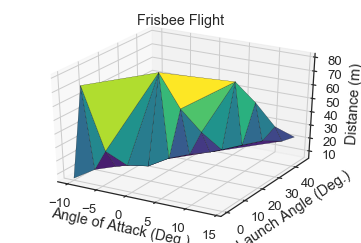

In [0]:
#Producing scatter plot of angles of attack, launch angles, and final x-distances of each simulation
#The answer to our question is the peak of this plot (which is unfortunately difficult to see)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = []
for a in aattack:
    k = 1
    while k < 11:
        x1.append(a)
        k = k + 1
y1 = []
for l in launch:
    q = 1
    while q < 14:
        y1.append(l*180/pi)
        q = q + 1
z1 = []
for l in launch:
    for a in aattack:
        z1.append(get_last_value(results2[l][a].xpos))
   

x = x1
y = y1 
z = z1

X, Y = np.meshgrid(x, y)
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='black', linewidths = 0.2);

ax.set_xlabel('Angle of Attack (Deg.)')
ax.set_ylabel('Launch Angle (Deg.)')
ax.set_zlabel('Distance (m)')
ax.set_title('Frisbee Flight')

plt.show()

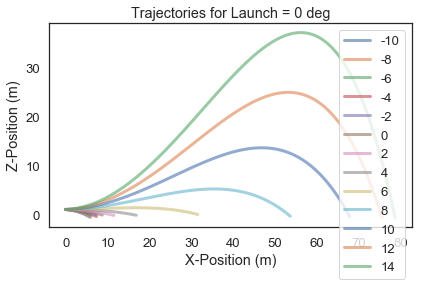

In [0]:
for i in aattack:
    plot(results2[0][i].xpos, results2[0][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 0 deg')

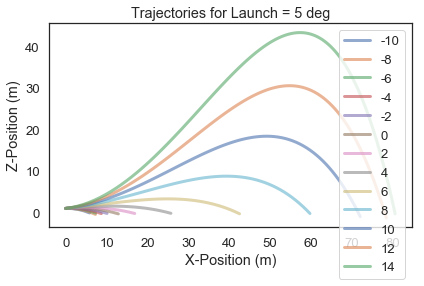

In [0]:
for i in aattack:
    plot(results2[launch[1]][i].xpos, results2[launch[1]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 5 deg')

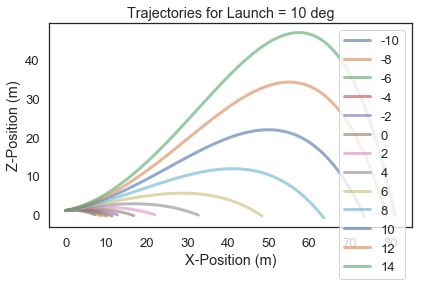

In [0]:
for i in aattack:
    plot(results2[launch[2]][i].xpos, results2[launch[2]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 10 deg')

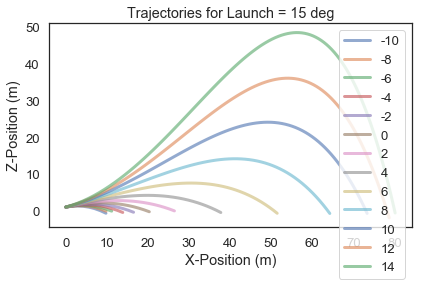

In [0]:
for i in aattack:
    plot(results2[launch[3]][i].xpos, results2[launch[3]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 15 deg')

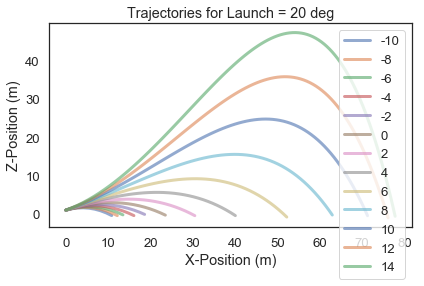

In [0]:
for i in aattack:
    plot(results2[launch[4]][i].xpos, results2[launch[4]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 20 deg')

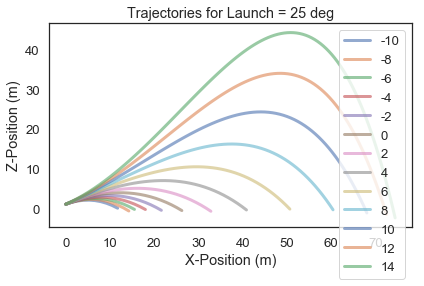

In [0]:
for i in aattack:
    plot(results2[launch[5]][i].xpos, results2[launch[5]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 25 deg')

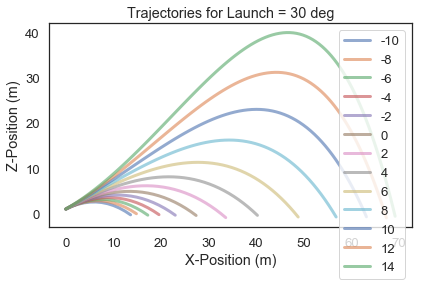

In [0]:
for i in aattack:
    plot(results2[launch[6]][i].xpos, results2[launch[6]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 30 deg')

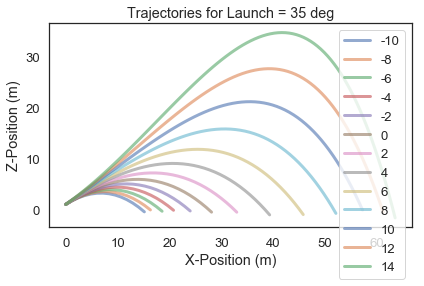

In [0]:
for i in aattack:
    plot(results2[launch[7]][i].xpos, results2[launch[7]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 35 deg')

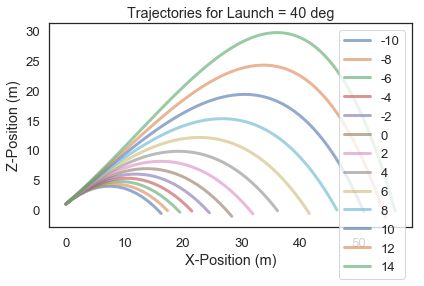

In [0]:
for i in aattack:
    plot(results2[launch[8]][i].xpos, results2[launch[8]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 40 deg')

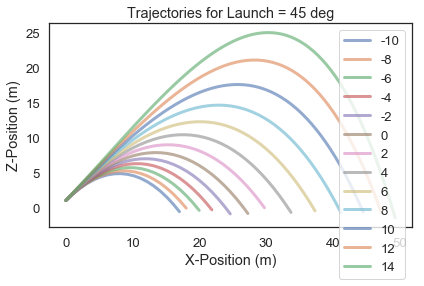

In [0]:
for i in aattack:
    plot(results2[launch[9]][i].xpos, results2[launch[9]][i].zpos, label = i)
    decorate(xlabel = 'X-Position (m)', ylabel = 'Z-Position (m)', 
             title = 'Trajectories for Launch = 45 deg')

Interpretation: Our model predicts that the maximum horizontal distance achieved by a frisbee throw (within the constraints of the angles of attack and launch angles we used) would be 81.16 meters for a launch angle of 10 degrees and an angle of attack of 14 degrees. We believe, based on our experience with frisbee throws, that the horizontal distances we found are reasonable. We are less sure of the vertical distances these throws achieved. The maximum vertical distance we found was almost 50 meters, which seems outside the realm of possibility. This is most likely due to our decision not to update angle of attack over time. Although we did not consider sideways motion due to the disc's spin, but this should not have significantly impacted the results. 

Our modeling process began with a simulation of a single frisbee throw with a given angle of attack and launch angle. During refinement of this process, we tested out different methods of determining the coefficients of lift and drag based on different data sets we found. With this accomplished, we were able to sweep the angle of attack for a given launch angle. Finally, we swept through different launch angles and angles of attack to produce our final model. The logical next steps in this modeling would be to allow for a changing angle of attack during flight, and then add in the y-direction of flight taking into account the disc's spin.